In [1]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.1'

from algorithms.utils import restore_state_multi_agent
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/for_paper_new/20250615_185919'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent(directory)

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
RECMLP ('demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm rec


In [3]:
config

{'ACTIVATION': 'tanh',
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': False,
  'temperature': True},
 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': True,
  'temperature': True},
 'BATTERY_OBS_KEYS': ('temperature',
  'soc',
  'demand',
  'generation',
  'buying_price',
  'selling_price',
  'sin_day_of_year',
  'cos_day_of_year',
  'sin_seconds_of_day',
  'cos_seconds_of_day',
  'network_REC_plus',
  'network_REC_minus'),
 'BETA_ADAM_BATTERIES': 0.9,
 'B

In [4]:
world_metadata

WorldMetadata(world_train={'num_passive_houses': 1, 'step': 3600, 'termination': {'max_iterations': None, 'min_soh': 0.6}, 'reward': {'trading_coeff': 1, 'operational_cost_coeff': 0, 'degradation_coeff': 1, 'clip_action_coeff': 1, 'glob_coeff': 1}, 'aging_options': {'degradation': True, 'fading': False}, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus'], 'use_reward_normalization': False, 'valorization_incentive_coeff': 8e-06, 'incentivizing_tariff_coeff': 8e-05, 'incentivizing_tariff_max_variable': 4e-05, 'incentivizing_tariff_baseline_variable': 0.00018, 'fairness_coeff': 0.0, 'smoothing_factor_rec_a

In [5]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

In [6]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (22, 43800, 3),
 'actions_rec': (22, 43800, 3),
 'balance_minus': (22, 43800),
 'balance_plus': (22, 43800),
 'buy_prices': (22, 43800, 3),
 'demands': (22, 43800, 3),
 'dones': {'REC_agent': (22, 43800),
  '__all__': (22, 43800),
  'battery_agent_0': (22, 43800),
  'battery_agent_1': (22, 43800),
  'battery_agent_2': (22, 43800)},
 'energy_to_batteries': (22, 43800, 3),
 'generations': (22, 43800, 3),
 'norm_reward': {'r_clipping': (22, 43800, 3),
  'r_deg': (22, 43800, 3),
  'r_glob': (22, 43800, 3),
  'r_op': (22, 43800, 3),
  'r_trad': (22, 43800, 3)},
 'pure_reward': {'r_clipping': (22, 43800, 3),
  'r_deg': (22, 43800, 3),
  'r_glob': (22, 43800, 3),
  'r_op': (22, 43800, 3),
  'r_trad': (22, 43800, 3)},
 'r_tot': (22, 43800, 3),
 'rec_reward': (22, 43800),
 'self_consumption': (22, 43800),
 'sell_prices': (22, 43800, 3),
 'soc': (22, 43800, 3),
 'soh': (22, 43800, 3),
 'tot_incentives': (22, 43800),
 'weig_reward': {'r_clipping': (22, 43800, 3),
  'r_deg': 

In [7]:
val_info['actions_rec']

array([[[3.3973634e-01, 3.3233547e-01, 3.2792822e-01],
        [3.3919010e-01, 3.3329493e-01, 3.2751492e-01],
        [3.3928528e-01, 3.3365476e-01, 3.2705995e-01],
        ...,
        [3.4078953e-01, 3.3033708e-01, 3.2887337e-01],
        [3.3898526e-01, 3.3091980e-01, 3.3009490e-01],
        [3.3875993e-01, 3.3126935e-01, 3.2997075e-01]],

       [[6.9715995e-01, 5.1073756e-02, 2.5176629e-01],
        [6.5616602e-01, 9.4677448e-02, 2.4915652e-01],
        [2.6425815e-01, 3.3860002e-02, 7.0188183e-01],
        ...,
        [9.6079546e-01, 1.6794421e-02, 2.2410229e-02],
        [9.8377168e-01, 8.5436273e-03, 7.6847966e-03],
        [9.8208749e-01, 9.4100684e-03, 8.5025011e-03]],

       [[8.1504726e-01, 4.4460841e-02, 1.4049187e-01],
        [8.2729751e-01, 8.1914812e-02, 9.0787664e-02],
        [1.7061111e-01, 1.3993605e-02, 8.1539530e-01],
        ...,
        [9.8511779e-01, 1.3165158e-02, 1.7170103e-03],
        [9.9677992e-01, 2.8707259e-03, 3.4939294e-04],
        [9.9678928e-01

In [8]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(22, 43800, 3)

In [9]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-3750.3552, -3094.8738, -2626.5696, -2456.5396, -2356.5112,
       -2316.502 , -2279.2124, -2263.6045, -2266.2214, -2262.9312,
       -2268.0496, -2295.585 , -2337.1838, -2356.9478, -2382.5237,
       -2401.5906, -2433.4773, -2463.1753, -2486.2422, -2497.904 ,
       -2514.9988, -2527.9019], dtype=float32)

In [10]:
val_info['r_tot'].shape

(22, 43800, 3)

In [11]:
val_info['r_tot'][7, :].sum(axis=0)

array([-914.8378 , -471.87506, -876.8921 ], dtype=float32)

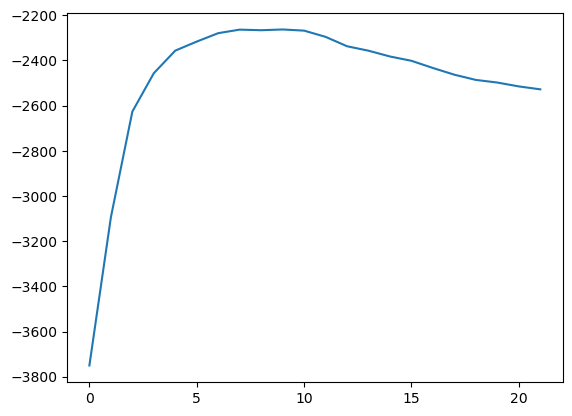

In [12]:
plt.plot(a)

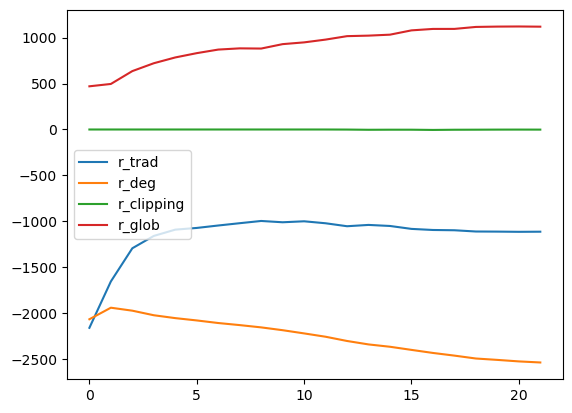

In [13]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

In [14]:
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

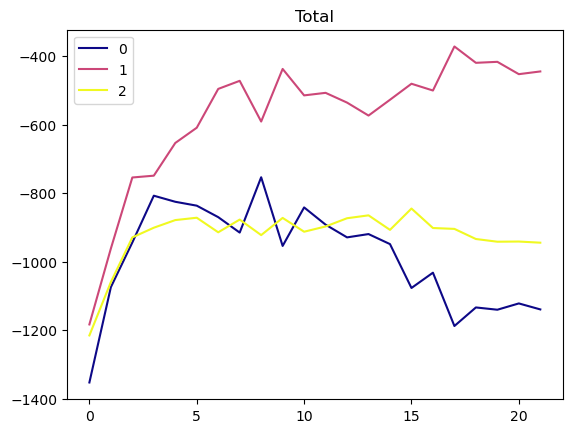

In [15]:
for i in range(n_agents):
    plt.plot(val_info['r_tot'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Total')
    plt.legend()

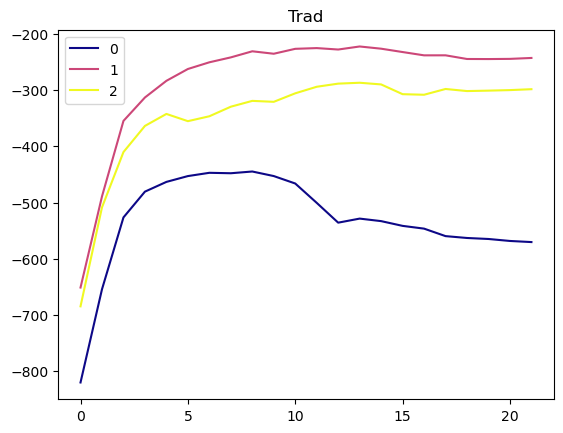

In [16]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Trad')
    plt.legend()

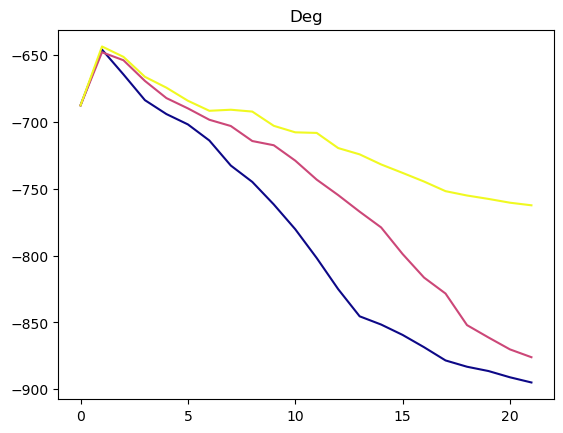

In [17]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Deg')

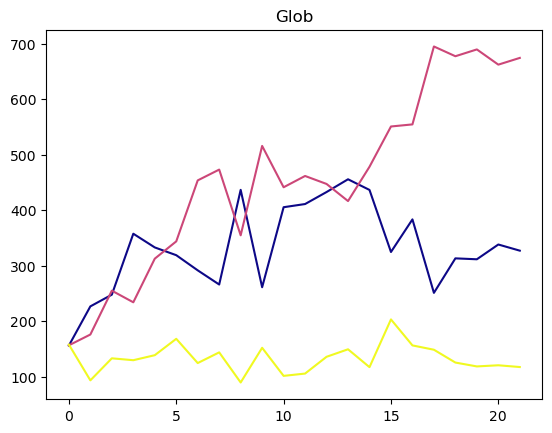

In [18]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_glob'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Glob')

In [19]:
val_info['self_consumption'].sum(axis=1)

array([5.0663405e+06, 5.3459160e+06, 6.8841905e+06, 7.8371620e+06,
       8.5161580e+06, 9.0244660e+06, 9.4411860e+06, 9.5734800e+06,
       9.5431760e+06, 1.0061423e+07, 1.0262094e+07, 1.0571459e+07,
       1.0968016e+07, 1.1029561e+07, 1.1140256e+07, 1.1642762e+07,
       1.1809509e+07, 1.1814604e+07, 1.2047110e+07, 1.2086670e+07,
       1.2100451e+07, 1.2077198e+07], dtype=float32)

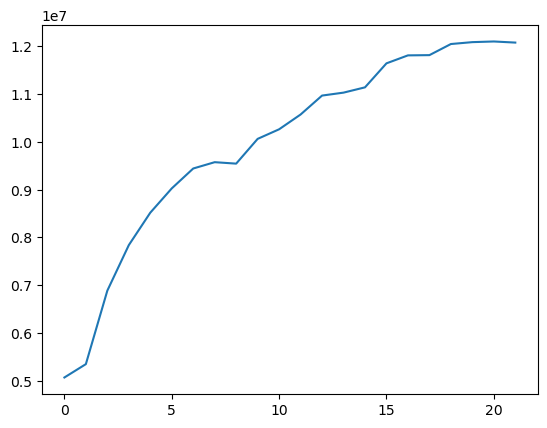

In [20]:
plt.plot(val_info['self_consumption'].sum(axis=1))

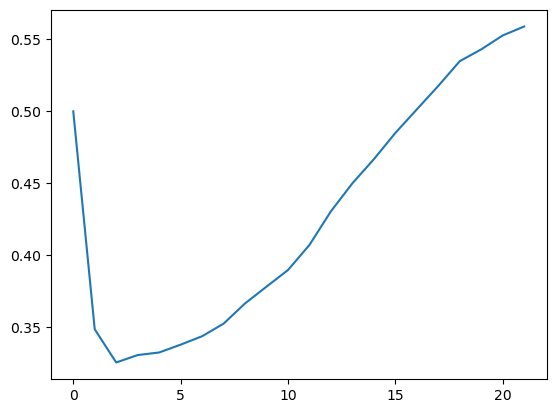

In [21]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [22]:
np.var(val_info['actions_rec'], axis=-1).shape

(22, 43800)

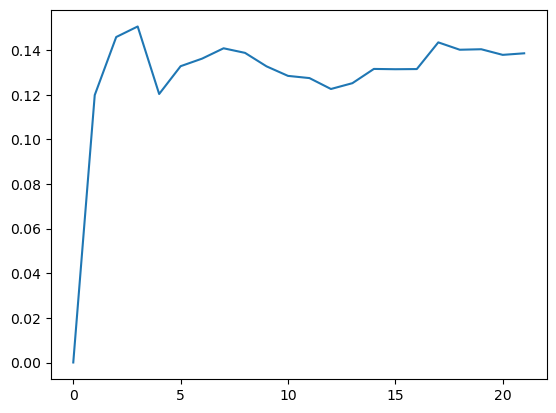

In [23]:
plt.plot(np.var(val_info['actions_rec'], axis=-1).mean(axis=1))

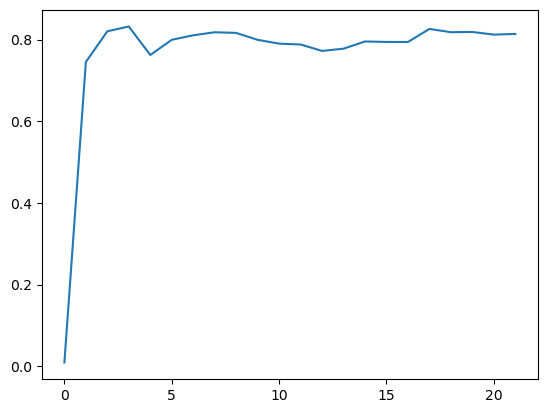

In [24]:
plt.plot(np.mean(np.max(val_info['actions_rec'], axis=-1) - np.min(val_info['actions_rec'], axis=-1), axis=1))